# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Hinge Loss

In [2]:
def svm_loss_vectorized(W, X, y, reg):
    
    loss = 0.0
    dW = np.zeros(W.shape)
    num_train = X.shape[0]
    
    s = X.dot(W)
    
    #Getting the correct scores
    correct_score = s[list(range(num_train)),y]
    correct_score = correct_score.reshape(num_train,-1)
    
    #Now adding the margin and subtracting the scores
    # sj - syi +1
    s += 1-correct_score
    
    #Making all the correct scores to zero as we find the max value in the loss, and the correct scores
    #don't contribute to the loss function.
    s[list(range(num_train)),y] = 0
    loss = np.sum(np.fmax(s,0))/num_train
    
    #adding the L2 regularization term
    loss += reg * np.sum(W * W) 
    
    #Now calculating the gradient.
    X_mask = np.zeros(s.shape) #Binarize the margins.
    X_mask[ s > 0] = 1 
    X_mask[np.arange(num_train),y] = -np.sum(X_mask,axis = 1)
    dW = X.T.dot(X_mask)
    dW = dW / num_train
    
    #Left with only the regularization term.
    dW += 2 * reg * W 
    
    return loss, dW

# Classifier

In [22]:
class LinearSVM(object):
    
    def __init__(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100, batch_size=200):
        num_train, dim = X.shape
        num_classes = len(np.unique(y))
        assert(num_classes == 3) # hue
        
        self.W = 0.001 * np.random.randn(dim, num_classes)
        for it in range(num_iters):
            #Consider random samples from 
            train_indices = np.random.choice(num_train, batch_size)
            x_batch = X[train_indices]
            y_batch = y[train_indices]
            
            #Finding the loss and computing the gradient
            loss, grad = self.loss(x_batch, y_batch, reg)
            
            #Updating the weights based on the gradient
            self.W -= learning_rate * grad
            
            #Printing the loss over verbose, to have a track
            if it % 100 == 0:
                print(f'iteration {it} / {num_iters}: loss {loss}')

    def loss(self, X_batch, y_batch, reg):    
        return svm_loss_vectorized(self.W, X_batch, y_batch, reg)
    
    def predict(self,X):
        # X has shape (num_samples, dim)
        y_pred = np.zeros(X.shape[0])
        scores = X.dot(self.W)
        y_pred = np.argmax(scores,axis=1) 
        return y_pred


# Sampling

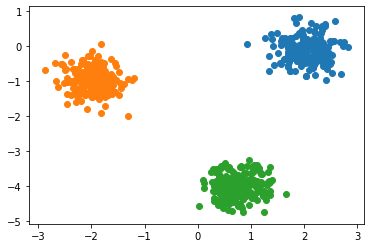

In [15]:
# Parameters
N_1 = 200
MU_1 = [2.0, -0.1]
SIGMA_1 = np.eye(2) * 0.1
N_2 = 200
MU_2 = [-2.0, -1.0]
SIGMA_2 = np.eye(2) * 0.1
N_3 = 200
MU_3 = [0.75, -4.0]
SIGMA_3 = np.eye(2) * 0.1

# Sample
X_1 = np.random.multivariate_normal(MU_1, SIGMA_1, N_1)
X_2 = np.random.multivariate_normal(MU_2, SIGMA_2, N_2)
X_3 = np.random.multivariate_normal(MU_3, SIGMA_3, N_3)

# Unify
X = np.vstack( (X_1, X_2, X_3) )
Y = np.array([0]*N_1 + [1]*N_2 + [2]*N_3)

# Append bias
X = np.hstack( (X, np.ones((X.shape[0], 1))) )

# Invariants
assert(len(X) == len(Y))
assert(X.shape[1] == 3)

# Plot
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.scatter(X_3[:,0], X_3[:,1], c='tab:green')
plt.show()

# Training

In [23]:
svm = LinearSVM(X, Y, learning_rate=1e-7, reg=5e4, num_iters=1500)
#plt.plot(loss_hist)
#plt.xlabel('Iteration number')
#plt.ylabel('Loss value')
#plt.show()

iteration 0 / 1500: loss 2.4102357837254154
iteration 100 / 1500: loss 2.0548722921688
iteration 200 / 1500: loss 2.00750345739358
iteration 300 / 1500: loss 2.0009195170446965
iteration 400 / 1500: loss 2.000048278111759
iteration 500 / 1500: loss 1.9999260598520556
iteration 600 / 1500: loss 1.9999149023276954
iteration 700 / 1500: loss 1.9999182503985204
iteration 800 / 1500: loss 1.999918725474416
iteration 900 / 1500: loss 1.9999159644573206
iteration 1000 / 1500: loss 1.9999207251002509
iteration 1100 / 1500: loss 1.999915178942626
iteration 1200 / 1500: loss 1.999920800901186
iteration 1300 / 1500: loss 1.9999251340535709
iteration 1400 / 1500: loss 1.9999156383362169


# Prediction

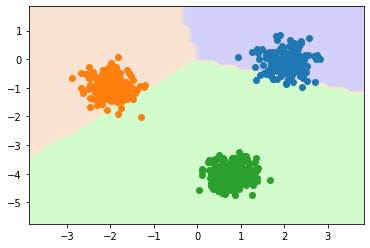

In [24]:
nx = 50
ny = 50

xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, nx),
                     np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, ny))

X_pred = np.hstack((xx.reshape((-1, 1)), yy.reshape((-1, 1)), np.ones((nx*ny, 1))))
Y_pred = svm.predict(X_pred)  # Returns 1-2-3.... Hmmmm....
#print(Y_pred.shape)
#print(Y == svm.predict(X))

cm = LinearSegmentedColormap.from_list('multi-classify', [(0.8,0.8,1), (1,0.9,0.8), (0.8, 1, 0.8)])

plt.contourf(xx, yy, Y_pred.reshape((ny, nx)), cmap=cm)
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.scatter(X_3[:,0], X_3[:,1], c='tab:green')
plt.show()